# Mini Hackathon 2023
# Final Round
## Part 1
## Team Doos


## **Assumptions**
### -The same number of distributors are available for June also.
### -Assumes no new distributors or current distributors changed.
### -The outlet for distributors is no different either


In [629]:
# Import Lybraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [630]:
#Import Datasets

sales = pd.read_csv('/content/Sales.csv')
distributorOutletinfo = pd.read_csv('/content/Distributor Outlet Mapping.csv')


In [631]:
sales.head()

,outlet_id,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity
0,outlet_code_78,2023-01-05 12:41,25mm,freezers available,Sweet Delights Mix,3
1,outlet_code_78,2023-01-12 13:05,0mm,freezers available,Sweet Delights Mix,3
2,outlet_code_78,2023-01-17 9:32,79mm,freezers available,Sweet Delights Mix,3
3,outlet_code_78,2023-01-27 14:21,194.51mm,freezers available,Sweet Delights Mix,2
4,outlet_code_78,2023-01-31 16:24,15mm,freezers available,Sweet Delights Mix,3


In [632]:
distributorOutletinfo.head()

,distributor_id,outlet_id
0,distributor_24,outlet_code_1
1,distributor_24,outlet_code_2
2,distributor_24,outlet_code_3
3,distributor_3,outlet_code_4
4,distributor_21,outlet_code_5


In [633]:
#Combining the distributorOutletinfo and sales datasets

finalDF = pd.merge(sales, distributorOutletinfo, on='outlet_id', how='inner')

In [634]:
finalDF.head()

,outlet_id,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity,distributor_id
0,outlet_code_78,2023-01-05 12:41,25mm,freezers available,Sweet Delights Mix,3,distributor_19
1,outlet_code_78,2023-01-12 13:05,0mm,freezers available,Sweet Delights Mix,3,distributor_19
2,outlet_code_78,2023-01-17 9:32,79mm,freezers available,Sweet Delights Mix,3,distributor_19
3,outlet_code_78,2023-01-27 14:21,194.51mm,freezers available,Sweet Delights Mix,2,distributor_19
4,outlet_code_78,2023-01-31 16:24,15mm,freezers available,Sweet Delights Mix,3,distributor_19


In [635]:
# Get month synthetic feature from transaction_time attribute

finalDF['transaction_time'] = pd.to_datetime(finalDF['transaction_time'])

finalDF['month'] = finalDF['transaction_time'].dt.month


finalDF.head()

,outlet_id,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity,distributor_id,month
0,outlet_code_78,2023-01-05 12:41:00,25mm,freezers available,Sweet Delights Mix,3,distributor_19,1
1,outlet_code_78,2023-01-12 13:05:00,0mm,freezers available,Sweet Delights Mix,3,distributor_19,1
2,outlet_code_78,2023-01-17 09:32:00,79mm,freezers available,Sweet Delights Mix,3,distributor_19,1
3,outlet_code_78,2023-01-27 14:21:00,194.51mm,freezers available,Sweet Delights Mix,2,distributor_19,1
4,outlet_code_78,2023-01-31 16:24:00,15mm,freezers available,Sweet Delights Mix,3,distributor_19,1


In [636]:
# Checking Null values

print('Total Null values = ',finalDF.isnull().sum().sum())

Total Null values =  0


In [637]:
# Check unique months

print("Unique classes in 'month':")
print(finalDF['month'].unique())

Unique classes in 'month':
[1 2 3 4 5]


In [638]:
# Make different datasets for months

# List to store DataFrames for each month
monthly_dfs = []

# Loop through months and filter the dataset
for i in range(1, 6):
    month_df = finalDF[finalDF['month'] == i]
    monthly_dfs.append(month_df)

    # Print unique classes in 'month' for the current month
    print(f"Unique classes in 'month' on month{i}DF:")
    print(month_df['month'].unique())
    print('\n')

# Print the first few rows of each monthly DataFrame
for i, month_df in enumerate(monthly_dfs, start=1):
    print(f'Month {i} DataFrame:')
    print(month_df.head())
    print('\n')

# Access the individual DataFrames (e.g., month1DF, month2DF, ..., month5DF) from the list if needed
month1DF, month2DF, month3DF, month4DF, month5DF = monthly_dfs


Unique classes in 'month' on month1DF:
[1]


Unique classes in 'month' on month2DF:
[2]


Unique classes in 'month' on month3DF:
[3]


Unique classes in 'month' on month4DF:
[4]


Unique classes in 'month' on month5DF:
[5]


Month 1 DataFrame:
        outlet_id    transaction_time expected_rainfall  \
0  outlet_code_78 2023-01-05 12:41:00              25mm   
1  outlet_code_78 2023-01-12 13:05:00               0mm   
2  outlet_code_78 2023-01-17 09:32:00              79mm   
3  outlet_code_78 2023-01-27 14:21:00          194.51mm   
4  outlet_code_78 2023-01-31 16:24:00              15mm   

          freezer_status            sku_name  sales_quantity  distributor_id  \
0    freezers available   Sweet Delights Mix               3  distributor_19   
1    freezers available   Sweet Delights Mix               3  distributor_19   
2    freezers available   Sweet Delights Mix               3  distributor_19   
3    freezers available   Sweet Delights Mix               2  distributor_19   
4

In [639]:
# Make new datsets for month which only containing distributor_id and sales_quantity

total_sales_per_distributor_month1 = month1DF.groupby('distributor_id')['sales_quantity'].sum().reset_index()
total_sales_per_distributor_month1.rename(columns={'sales_quantity': 'total_sales_quantity_month1'}, inplace=True)

total_sales_per_distributor_month2 = month2DF.groupby('distributor_id')['sales_quantity'].sum().reset_index()
total_sales_per_distributor_month2.rename(columns={'sales_quantity': 'total_sales_quantity_month2'}, inplace=True)

total_sales_per_distributor_month3 = month3DF.groupby('distributor_id')['sales_quantity'].sum().reset_index()
total_sales_per_distributor_month3.rename(columns={'sales_quantity': 'total_sales_quantity_month3'}, inplace=True)

total_sales_per_distributor_month4 = month4DF.groupby('distributor_id')['sales_quantity'].sum().reset_index()
total_sales_per_distributor_month4.rename(columns={'sales_quantity': 'total_sales_quantity_month4'}, inplace=True)

total_sales_per_distributor_month5 = month5DF.groupby('distributor_id')['sales_quantity'].sum().reset_index()
total_sales_per_distributor_month5.rename(columns={'sales_quantity': 'total_sales_quantity_month5'}, inplace=True)



In [640]:
total_sales_per_distributor_month1

,distributor_id,total_sales_quantity_month1
0,distributor_1,5565
1,distributor_10,15060
2,distributor_11,36338
3,distributor_12,15226
4,distributor_13,15938
5,distributor_14,39276
6,distributor_15,13907
7,distributor_16,34856
8,distributor_17,5000
9,distributor_18,5104


In [641]:
total_sales_per_distributor_month2

,distributor_id,total_sales_quantity_month2
0,distributor_1,5713
1,distributor_10,14256
2,distributor_11,33506
3,distributor_12,14371
4,distributor_13,15365
5,distributor_14,36403
6,distributor_15,13362
7,distributor_16,32889
8,distributor_17,5111
9,distributor_18,4969


In [642]:
total_sales_per_distributor_month3

,distributor_id,total_sales_quantity_month3
0,distributor_1,5952
1,distributor_10,16373
2,distributor_11,41554
3,distributor_12,17003
4,distributor_13,17521
5,distributor_14,44780
6,distributor_15,15769
7,distributor_16,39765
8,distributor_17,5426
9,distributor_18,5536


In [643]:
total_sales_per_distributor_month4

,distributor_id,total_sales_quantity_month4
0,distributor_1,7013
1,distributor_10,18549
2,distributor_11,46093
3,distributor_12,19125
4,distributor_13,19768
5,distributor_14,50528
6,distributor_15,17773
7,distributor_16,44622
8,distributor_17,6337
9,distributor_18,6555


In [644]:
total_sales_per_distributor_month5

,distributor_id,total_sales_quantity_month5
0,distributor_1,9725
1,distributor_10,26616
2,distributor_11,64173
3,distributor_12,26407
4,distributor_13,28203
5,distributor_14,71583
6,distributor_15,25340
7,distributor_16,62599
8,distributor_17,9125
9,distributor_18,8889


In [645]:
# Getting total sales for each month

# List of DataFrames
monthly_dfs = [total_sales_per_distributor_month1,
               total_sales_per_distributor_month2,
               total_sales_per_distributor_month3,
               total_sales_per_distributor_month4,
               total_sales_per_distributor_month5]

# Iterate through the DataFrames and calculate the total sales quantity for each month
for i, df in enumerate(monthly_dfs, start=1):
    total_sales_quantity_month_i = df[f'total_sales_quantity_month{i}'].sum()
    print(f'Total Sales for Month {i}: {total_sales_quantity_month_i}')


Total Sales for Month 1: 411775
Total Sales for Month 2: 390729
Total Sales for Month 3: 461304
Total Sales for Month 4: 522362
Total Sales for Month 5: 732820


In [646]:
# Keep distributor_id as only integer value and sort distributor_id

# List of DataFrames
monthly_dfs = [total_sales_per_distributor_month1,
               total_sales_per_distributor_month2,
               total_sales_per_distributor_month3,
               total_sales_per_distributor_month4,
               total_sales_per_distributor_month5]

# Modify 'distributor_id' attribute and sort each DataFrame
for i, df in enumerate(monthly_dfs, start=1):
    # Keep only integer values in 'distributor_id'
    df['distributor_id'] = df['distributor_id'].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))))

    # Sort the DataFrame based on 'distributor_id'
    df.sort_values(by='distributor_id', inplace=True)

    # Reset the index after sorting
    df.reset_index(drop=True, inplace=True)

    # Print the modified and sorted DataFrame
    print(f'Modified and Sorted DataFrame for Month {i}:\n{df}\n')


Modified and Sorted DataFrame for Month 1:
    distributor_id  total_sales_quantity_month1
0                1                         5565
1                2                         6283
2                3                        16875
3                4                        37310
4                5                        15241
5                6                         5330
6                7                         5138
7                8                        14366
8                9                        12778
9               10                        15060
10              11                        36338
11              12                        15226
12              13                        15938
13              14                        39276
14              15                        13907
15              16                        34856
16              17                         5000
17              18                         5104
18              19                        154

In [647]:
# Merge all datasets of month in to one dataset

# List of DataFrames
monthly_dfs = [total_sales_per_distributor_month1,
               total_sales_per_distributor_month2,
               total_sales_per_distributor_month3,
               total_sales_per_distributor_month4,
               total_sales_per_distributor_month5]

# Merge DataFrames based on 'distributor_id'
merged_df = monthly_dfs[0]  # Initialize with the first DataFrame

# Loop through the rest of the DataFrames and merge on 'distributor_id'
for df in monthly_dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='distributor_id')

merged_df


,distributor_id,total_sales_quantity_month1,total_sales_quantity_month2,total_sales_quantity_month3,total_sales_quantity_month4,total_sales_quantity_month5
0,1,5565,5713,5952,7013,9725
1,2,6283,6310,6977,8062,11226
2,3,16875,16411,18620,21089,30679
3,4,37310,35147,43206,47577,66851
4,5,15241,14483,16922,19599,27041
5,6,5330,5194,5604,6728,9118
6,7,5138,4933,5416,6258,8856
7,8,14366,13922,15702,18395,25400
8,9,12778,12506,14297,16012,22697
9,10,15060,14256,16373,18549,26616


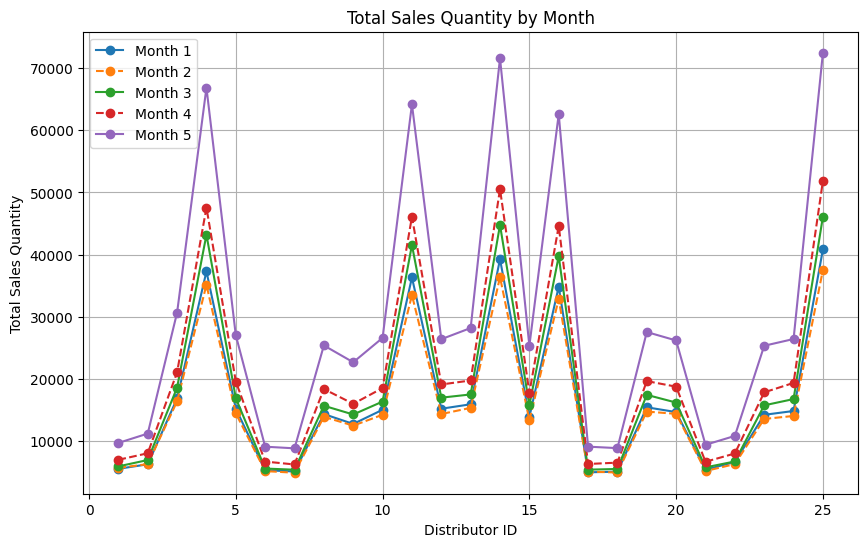

In [648]:

# Plotting the sales values according to distributor_id for each month

# Extract relevant columns for plotting
distributor_id = merged_df['distributor_id']
total_sales_quantity_month1 = merged_df['total_sales_quantity_month1']
total_sales_quantity_month2 = merged_df['total_sales_quantity_month2']
total_sales_quantity_month3 = merged_df['total_sales_quantity_month3']
total_sales_quantity_month4 = merged_df['total_sales_quantity_month4']
total_sales_quantity_month5 = merged_df['total_sales_quantity_month5']

# Plot each total sales quantity against distributor_id with different colors
plt.figure(figsize=(10, 6))
plt.plot(distributor_id, total_sales_quantity_month1, label='Month 1', marker='o', linestyle='-')
plt.plot(distributor_id, total_sales_quantity_month2, label='Month 2', marker='o', linestyle='--')
plt.plot(distributor_id, total_sales_quantity_month3, label='Month 3', marker='o', linestyle='-')
plt.plot(distributor_id, total_sales_quantity_month4, label='Month 4', marker='o', linestyle='--')
plt.plot(distributor_id, total_sales_quantity_month5, label='Month 5', marker='o', linestyle='-')

# Customize the plot
plt.title('Total Sales Quantity by Month')
plt.xlabel('Distributor ID')
plt.ylabel('Total Sales Quantity')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [649]:
# Calculate the percentage for each month and add new columns

for i in range(1, 6):
    column_name = f'percentage_month{i}'
    merged_df[column_name] = (merged_df[f'total_sales_quantity_month{i}'] / merged_df[f'total_sales_quantity_month{i}'].sum()) * 100

merged_df


,distributor_id,total_sales_quantity_month1,total_sales_quantity_month2,total_sales_quantity_month3,total_sales_quantity_month4,total_sales_quantity_month5,percentage_month1,percentage_month2,percentage_month3,percentage_month4,percentage_month5
0,1,5565,5713,5952,7013,9725,1.351466,1.462139,1.290255,1.342556,1.327065
1,2,6283,6310,6977,8062,11226,1.525833,1.614930,1.512452,1.543374,1.531891
2,3,16875,16411,18620,21089,30679,4.098112,4.200098,4.036384,4.037239,4.186431
3,4,37310,35147,43206,47577,66851,9.060773,8.995237,9.366058,9.108052,9.122431
4,5,15241,14483,16922,19599,27041,3.701293,3.706661,3.668297,3.751996,3.689992
5,6,5330,5194,5604,6728,9118,1.294396,1.329310,1.214817,1.287996,1.244235
6,7,5138,4933,5416,6258,8856,1.247769,1.262512,1.174063,1.198020,1.208482
7,8,14366,13922,15702,18395,25400,3.488798,3.563083,3.403829,3.521504,3.466063
8,9,12778,12506,14297,16012,22697,3.103151,3.200684,3.099258,3.065307,3.097214
9,10,15060,14256,16373,18549,26616,3.657337,3.648565,3.549286,3.550986,3.631997


In [650]:
# Print the sum of each percentage column

print('Sum of percentage_month1:', merged_df['percentage_month1'].sum())
print('Sum of percentage_month2:', merged_df['percentage_month2'].sum())
print('Sum of percentage_month3:', merged_df['percentage_month3'].sum())
print('Sum of percentage_month4:', merged_df['percentage_month4'].sum())
print('Sum of percentage_month5:', merged_df['percentage_month5'].sum())


Sum of percentage_month1: 99.99999999999999
Sum of percentage_month2: 100.0
Sum of percentage_month3: 100.0
Sum of percentage_month4: 100.0
Sum of percentage_month5: 100.0


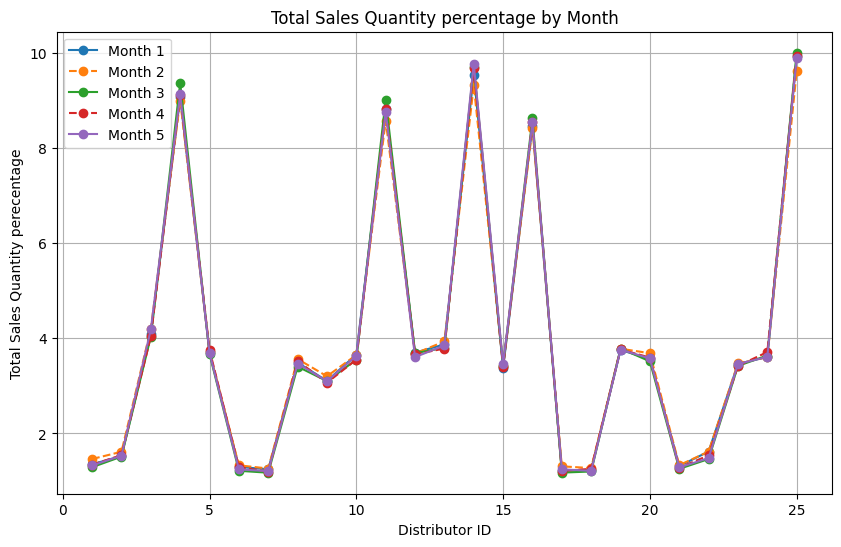

In [651]:
# Plotting the average sales values according to distributor_id for each month


# Extract relevant columns for plotting
distributor_id = merged_df['distributor_id']
total_sales_quantity_month1 = merged_df['percentage_month1']
total_sales_quantity_month2 = merged_df['percentage_month2']
total_sales_quantity_month3 = merged_df['percentage_month3']
total_sales_quantity_month4 = merged_df['percentage_month4']
total_sales_quantity_month5 = merged_df['percentage_month5']

# Plot each total sales quantity against distributor_id with different colors
plt.figure(figsize=(10, 6))
plt.plot(distributor_id, total_sales_quantity_month1, label='Month 1', marker='o', linestyle='-')
plt.plot(distributor_id, total_sales_quantity_month2, label='Month 2', marker='o', linestyle='--')
plt.plot(distributor_id, total_sales_quantity_month3, label='Month 3', marker='o', linestyle='-')
plt.plot(distributor_id, total_sales_quantity_month4, label='Month 4', marker='o', linestyle='--')
plt.plot(distributor_id, total_sales_quantity_month5, label='Month 5', marker='o', linestyle='-')

# Customize the plot
plt.title('Total Sales Quantity percentage by Month')
plt.xlabel('Distributor ID')
plt.ylabel('Total Sales Quantity perecentage')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [652]:
# Calculate the average percentage for each distributor

merged_df['average_percentage'] = merged_df[['percentage_month1', 'percentage_month2', 'percentage_month3', 'percentage_month4', 'percentage_month5']].mean(axis=1)

merged_df


,distributor_id,total_sales_quantity_month1,total_sales_quantity_month2,total_sales_quantity_month3,total_sales_quantity_month4,total_sales_quantity_month5,percentage_month1,percentage_month2,percentage_month3,percentage_month4,percentage_month5,average_percentage
0,1,5565,5713,5952,7013,9725,1.351466,1.462139,1.290255,1.342556,1.327065,1.354696
1,2,6283,6310,6977,8062,11226,1.525833,1.614930,1.512452,1.543374,1.531891,1.545696
2,3,16875,16411,18620,21089,30679,4.098112,4.200098,4.036384,4.037239,4.186431,4.111652
3,4,37310,35147,43206,47577,66851,9.060773,8.995237,9.366058,9.108052,9.122431,9.130510
4,5,15241,14483,16922,19599,27041,3.701293,3.706661,3.668297,3.751996,3.689992,3.703648
5,6,5330,5194,5604,6728,9118,1.294396,1.329310,1.214817,1.287996,1.244235,1.274151
6,7,5138,4933,5416,6258,8856,1.247769,1.262512,1.174063,1.198020,1.208482,1.218169
7,8,14366,13922,15702,18395,25400,3.488798,3.563083,3.403829,3.521504,3.466063,3.488656
8,9,12778,12506,14297,16012,22697,3.103151,3.200684,3.099258,3.065307,3.097214,3.113123
9,10,15060,14256,16373,18549,26616,3.657337,3.648565,3.549286,3.550986,3.631997,3.607634


In [653]:
# Total sum of average percentages
print('Sum of percentages:', merged_df['average_percentage'].sum())


Sum of percentages: 100.0


In [654]:
# Calculate the sales for each distributor for the 6th month
merged_df['predicted_sales_month6'] = (merged_df['average_percentage'] / 100) * 547575

# Round the predicted sales
merged_df['predicted_sales_month6'] = merged_df['predicted_sales_month6'].round()

merged_df


,distributor_id,total_sales_quantity_month1,total_sales_quantity_month2,total_sales_quantity_month3,total_sales_quantity_month4,total_sales_quantity_month5,percentage_month1,percentage_month2,percentage_month3,percentage_month4,percentage_month5,average_percentage,predicted_sales_month6
0,1,5565,5713,5952,7013,9725,1.351466,1.462139,1.290255,1.342556,1.327065,1.354696,7418.0
1,2,6283,6310,6977,8062,11226,1.525833,1.614930,1.512452,1.543374,1.531891,1.545696,8464.0
2,3,16875,16411,18620,21089,30679,4.098112,4.200098,4.036384,4.037239,4.186431,4.111652,22514.0
3,4,37310,35147,43206,47577,66851,9.060773,8.995237,9.366058,9.108052,9.122431,9.130510,49996.0
4,5,15241,14483,16922,19599,27041,3.701293,3.706661,3.668297,3.751996,3.689992,3.703648,20280.0
5,6,5330,5194,5604,6728,9118,1.294396,1.329310,1.214817,1.287996,1.244235,1.274151,6977.0
6,7,5138,4933,5416,6258,8856,1.247769,1.262512,1.174063,1.198020,1.208482,1.218169,6670.0
7,8,14366,13922,15702,18395,25400,3.488798,3.563083,3.403829,3.521504,3.466063,3.488656,19103.0
8,9,12778,12506,14297,16012,22697,3.103151,3.200684,3.099258,3.065307,3.097214,3.113123,17047.0
9,10,15060,14256,16373,18549,26616,3.657337,3.648565,3.549286,3.550986,3.631997,3.607634,19755.0


In [655]:
print('Sum of sales for june:', merged_df['predicted_sales_month6'].sum())


Sum of sales for june: 547575.0


In [656]:
# Create a new DataFrame with only 'distributor_id' and 'predicted_sales_month6'
predicted_sales_df = merged_df[['distributor_id', 'predicted_sales_month6']]
predicted_sales_df



,distributor_id,predicted_sales_month6
0,1,7418.0
1,2,8464.0
2,3,22514.0
3,4,49996.0
4,5,20280.0
5,6,6977.0
6,7,6670.0
7,8,19103.0
8,9,17047.0
9,10,19755.0


In [657]:
# Create a new DataFrame with 'distributor_' prefix and 'predicted_sales_month6' as integer type
predicted_sales_df = merged_df[['distributor_id', 'predicted_sales_month6']].copy()

# Add 'distributor_' prefix to 'distributor_id' and keep it as a string
predicted_sales_df['distributor_id'] = 'distributor_' + predicted_sales_df['distributor_id'].astype(str)

# Convert 'predicted_sales_month6' to integer type
predicted_sales_df['predicted_sales_month6'] = predicted_sales_df['predicted_sales_month6'].astype(int)

predicted_sales_df


,distributor_id,predicted_sales_month6
0,distributor_1,7418
1,distributor_2,8464
2,distributor_3,22514
3,distributor_4,49996
4,distributor_5,20280
5,distributor_6,6977
6,distributor_7,6670
7,distributor_8,19103
8,distributor_9,17047
9,distributor_10,19755


In [658]:
# rename predicted_sales_month6 column to sales_target

predicted_sales_df.rename(columns={'predicted_sales_month6': 'sales_target'}, inplace=True)
predicted_sales_df

,distributor_id,sales_target
0,distributor_1,7418
1,distributor_2,8464
2,distributor_3,22514
3,distributor_4,49996
4,distributor_5,20280
5,distributor_6,6977
6,distributor_7,6670
7,distributor_8,19103
8,distributor_9,17047
9,distributor_10,19755


In [659]:
print('Sum of sales for june:', predicted_sales_df['sales_target'].sum())


Sum of sales for june: 547575


In [660]:
# Export the predicted_sales_df DataFrame to a CSV file
predicted_sales_df.to_csv('Part1_Results_Doos.csv', index=False)
